In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+'');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

# COVID-19 Vaccine and Treatment Development Tracker

Welcome to **covid-vaccine-tracker.com**. This website presents a summary of the data published by the **WHO** regarding the develipment of COVID-19 vaccines (https://www.who.int/blueprint/priority-diseases/key-action/novel-coronavirus-landscape-ncov.pdf?ua=1). Data for treatments for COVID-19 under development is derived from the **Milken Institute** vaccine and treatment spreadsheet (https://milkeninstitute.org/sites/default/files/2020-03/Covid19-Tracker-3-36-20-FINAL.pdf). No modifications have been made to the data. This has been done as an attempt to make this information more easily accessible to the public. The website is updated on a daily basis.

## COVID-19 Vaccines in Development

### COVID-19 Vaccine Platforms in Development

In [2]:


import pandas as pd

import tabula

import requests

from ggplot import *

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

import matplotlib

# Change figure sizes
temp = plt.rcParams['figure.dpi'] = 100

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


#url = 'https://milkeninstitute.org/sites/default/files/2020-03/Covid19-Tracker-3-36-20-FINAL.pdf'

url = 'https://www.who.int/blueprint/priority-diseases/key-action/novel-coronavirus-landscape-ncov.pdf?ua=1'

myfile = requests.get(url)
open('COVID19-data.pdf', 'wb').write(myfile.content)

#declare the path of your file
file_path = "COVID19-data.pdf"
#Convert your file
df = tabula.read_pdf(file_path, pages='all', lattice=True,multiple_tables=False)
#df = df[10]
#df = df.drop(index=0)
df = df[0]
df = df.dropna(axis=0,thresh=5)

Got stderr: Mar 27, 2020 11:51:25 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font BCDGEE+Calibri-Light are not implemented in PDFBox and will be ignored
Mar 27, 2020 11:51:25 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font BCDIEE+Calibri are not implemented in PDFBox and will be ignored



In [3]:
#%% Clean the data


df.columns = ['platform', 'type_product', 'developer', 'covid', 'stage',
              'other']

a = df['platform'].values
aa = df['stage'].values
b = []

for i in range(len(a)):
    #aa[i] = aa[i].replace('\r',' ')
    b.append(a[i].replace('\r',' '))
    if b[i] == 'Platform':
        b[i] = np.nan

df['platform'] = b

# Evaluate the different trial types
stages = ['Pre-Clinical', 'Phase 1', 'Phase 2', 'Phase 3']

c = df['stage'].values
stage_list = []

for i in range(len(c)):
    stage = c[i]
    for j in range(len(stages)):
        if stages[j] in stage:
            stage_list.append(stages[j])
    if len(stage_list)<i+1:
            stage_list.append(np.nan)
    

df['stage'] = stage_list


# Change the typer of product
d = df['type_product'].values
b = []

for i in range(len(d)):
    b.append(d[i].replace('\r',' '))
    if b[i] == 'Type of candidate vaccine':
        b[i] = np.nan

df['type_product'] = b

# Change the developer names
d = df['developer'].values
b = []

for i in range(len(d)):
    b.append(d[i].replace('\r',' '))
    if b[i] == 'Developer':
        b[i] = np.nan

df['developer'] = b

# Change the other names
d = df['other'].values
b = []

for i in range(len(d)):
    if str(d[i]) == 'nan':
        b.append(np.nan)
    else:
        b.append(d[i].replace('\r',' '))
    if b[i] == 'Same platform for non-Coronavirus candidates':
        b[i] = np.nan

df['other'] = b

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


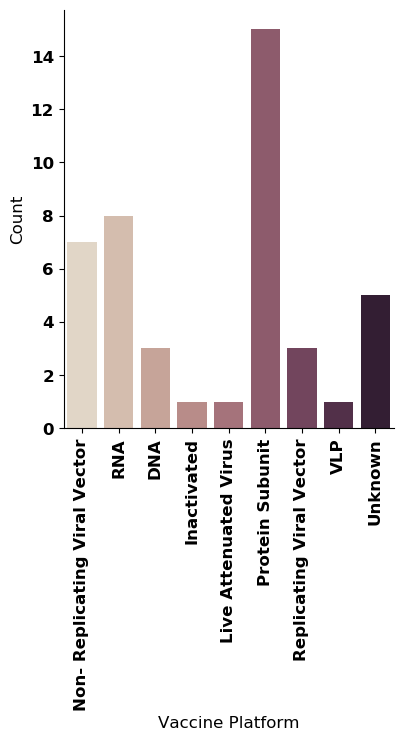

In [4]:

#%% Plot
#fig=plt.figure(figsize=(25, 10), dpi= 80, facecolor='w', edgecolor='k')
chart = sns.catplot(x="platform", kind="count", palette="ch:.25", data=df);
t = plt.xlabel('Vaccine Platform')
t = plt.ylabel('Count')
t = chart.set_xticklabels(rotation=90)


#chart2 = sns.catplot(x="stage", kind="count", palette="ch:.25", data=df);
#t = plt.xlabel('FDA Phase')
#t = chart2.set_xticklabels(rotation=75)

#%%
#plt.figure()
#plat_count = df['platform'].value_counts()
#chart3 = sns.barplot(plat_count.index, plat_count.values, alpha=0.8,palette="ch:.25")
#plt.setp(chart3.get_xticklabels(), rotation=90)
#plt.xlabel('Vaccine Platform')
#plt.ylabel('Count')



### Vaccine Clincal Trial Phase

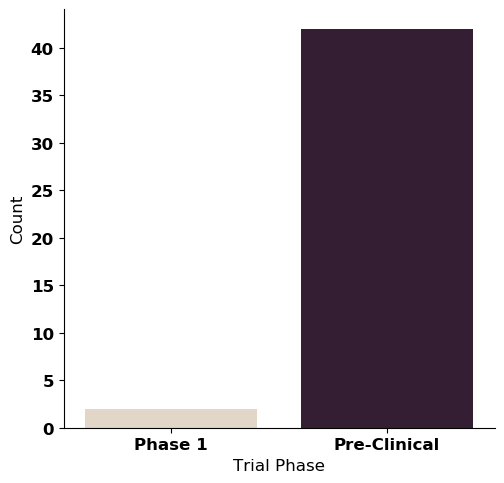

In [5]:
chart2 = sns.catplot(x="stage", kind="count", palette="ch:.25", data=df);
t = plt.xlabel('Trial Phase')
t = plt.ylabel('Count')
t = chart2.set_xticklabels(rotation=0)

### Vaccine Data

I have filtered the WHO data and made it more accessible. If you would like a spreadsheet version of this data, please email me at: *covid.vaccine.tracker@gmail.com*

In [6]:
df = df.drop(columns='covid')
df.columns = ['Vaccine Platform', 'Vaccine Specifics', 'Company \n Developer', 'Trial Stage', 'Other Uses']
df = df.dropna(axis=0,thresh=4)

In [7]:
# Show an interactive dataframe table
import itables.interactive
df

<IPython.core.display.Javascript object>

,Vaccine Platform,Vaccine Specifics,Company Developer,Trial Stage,Other Uses


## COVID-19 Treatment Options in Development

In [8]:
# load the data
url = 'https://milkeninstitute.org/sites/default/files/2020-03/Covid19-Tracker-3-36-20-FINAL.pdf'

#url = 'https://www.who.int/blueprint/priority-diseases/key-action/novel-coronavirus-landscape-ncov.pdf?ua=1'

myfile = requests.get(url)
open('COVID19-data2.pdf', 'wb').write(myfile.content)

#declare the path of your file
file_path = "COVID19-data2.pdf"
#Convert your file
df = tabula.read_pdf(file_path, pages='all', lattice=True,multiple_tables=True)
#df = df[10]
#df = df.drop(index=0)
#df = df[0]
#df = df.dropna(axis=0,thresh=5)



for i in range(len(df)):
    temp_df = df[i]
    if temp_df.shape[1] == 9:
        if 'df_all' in locals():
            df_all = df_all.append(temp_df)
        else:
            df_all = temp_df
        
df_all = df_all.dropna(axis=0, thresh=5)
df_all = df_all.dropna(axis=1, how='all')

In [9]:
# prepare the data
#%% Remove the control characters
cols = list(df_all.columns)
for i in range(len(cols)):
    list_a = df_all[cols[i]].values
    for j in range(len(list_a)):
        if isinstance(list_a[j], str) and ('\r' in list_a[j]):
            list_a[j] = list_a[j].replace('\r',' ')
        if isinstance(list_a[j], str) and ('*' in list_a[j]):
            list_a[j] = list_a[j].replace('*','')
        
    df_all[cols[i]] = list_a

for i in range(len(cols)):
    if isinstance(cols[i], str) and ('\r' in cols[i]):
        cols[i] = cols[i].replace('\r',' ')
    if isinstance(cols[i], str) and ('*' in cols[i]):
        cols[i] = cols[i].replace('*','')
    
df_all.columns = cols

### COVID-19 Treatment Options (Top 5 Pursued Approaches)

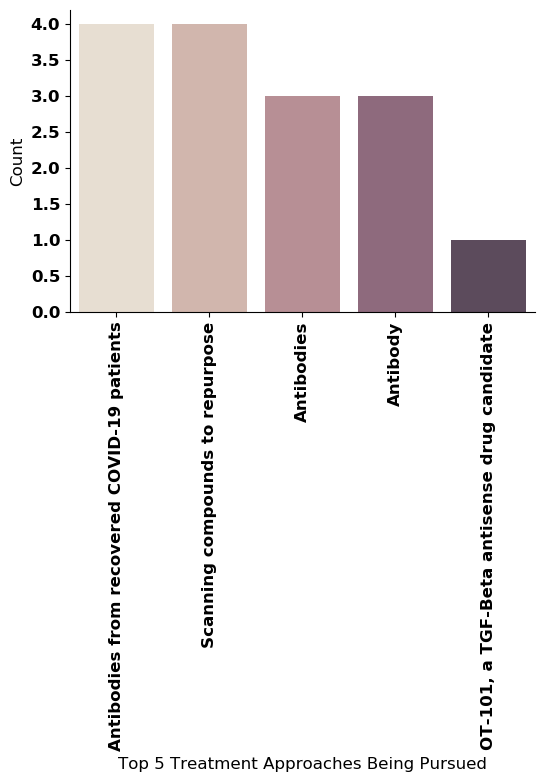

In [10]:
plat_count = df_all['Type of Product - Treatment'].value_counts()
n_plot = 5
chart = sns.barplot(plat_count[:n_plot].index, plat_count[:n_plot].values, alpha=0.8,palette="ch:.25")
plt.setp(chart.get_xticklabels(), rotation=90)
plt.xlabel('Top '+ str(n_plot)+' Treatment Approaches Being Pursued')
plt.ylabel('Count')
chart.spines['top'].set_visible(False)
chart.spines['right'].set_visible(False)

### Treatment Trial Phase

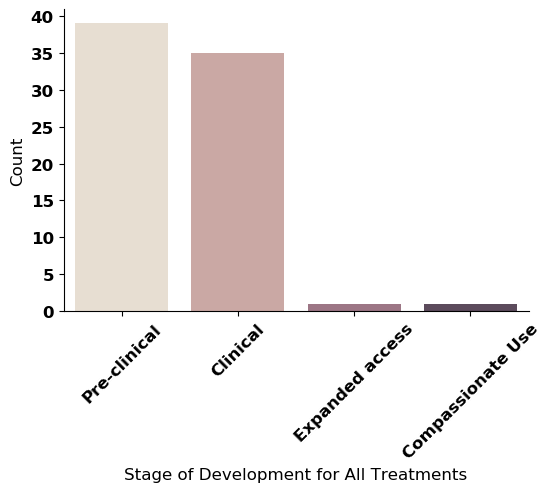

In [16]:
plat_count = df_all['Current Stage of Development'].value_counts()
chart = sns.barplot(plat_count.index, plat_count.values, alpha=0.8,palette="ch:.25")
plt.setp(chart.get_xticklabels(), rotation=45)
plt.xlabel('Stage of Development for All Treatments')
plt.ylabel('Count')
chart.spines['top'].set_visible(False)
chart.spines['right'].set_visible(False)

### Treatment Clinical Trial Phases and Months

In [13]:
#%% Get the dates for the clinical trials

phases = []
dates = []
timing = df_all['Anticipated Next Steps Timing'].values
for i in range(len(timing)):
    if isinstance(timing[i], str) and ('Phase 1' in timing[i]):
        phases.append('Phase 1')
    elif isinstance(timing[i], str) and ('Phase 2' in timing[i]):
        phases.append('Phase 2')
    else:
        phases.append(np.nan)


months = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']
for i in range(len(timing)):
    for j in range(len(months)):
        if isinstance(timing[i], str) and (months[j] in timing[i]):
            dates.append(months[j])
    if len(dates)<i+1:
        dates.append(np.nan)

df_all2 = df_all.copy()
df_all2['dates'] = dates
df_all2['phases'] = phases

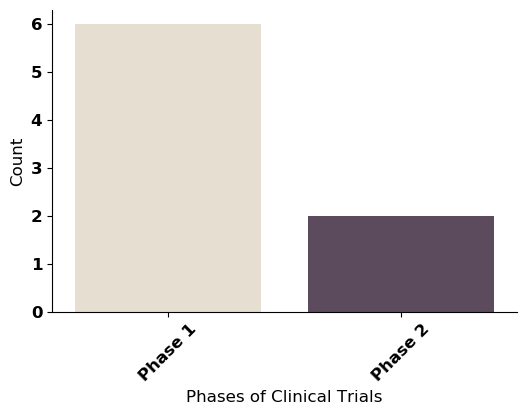

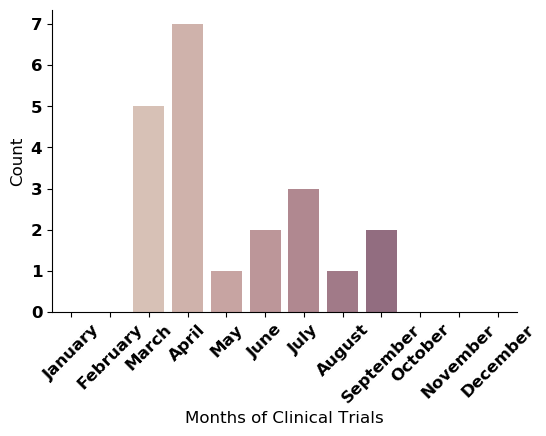

In [15]:
#%%

plat_count = df_all2['phases'].value_counts()
chart = sns.barplot(plat_count.index, plat_count.values, alpha=0.8,palette="ch:.25")
plt.setp(chart.get_xticklabels(), rotation=45)
plt.xlabel('Phases of Clinical Trials')
plt.ylabel('Count')
chart.spines['top'].set_visible(False)
chart.spines['right'].set_visible(False)  

#%%
plt.figure()
plat_count = df_all2['dates'].value_counts()
chart = sns.barplot(plat_count.index, plat_count.values, alpha=0.8,palette="ch:.25", order=months)
plt.setp(chart.get_xticklabels(), rotation=45)
plt.xlabel('Months of Clinical Trials')
plt.ylabel('Count')
chart.spines['top'].set_visible(False)
chart.spines['right'].set_visible(False)  



### Treatment Data

In [17]:
df_all

,Number,Type of Product - Treatment,FDA-Approved Indications,Developer/Researcher,Current Stage of Development,Funding Sources,Anticipated Next Steps Timing,Sources,FDA-Approved Indications (Treatments),Clinical Trials Ongoing for Other Diseases,Developer/ Researcher


### Citation

Lucas, A. COVID-19 Vaccine Development Tracker. 27 Mar. 2020, covid-vaccine-tracker.com. DOI:10.5281/zenodo.3731761